In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset
df = pd.read_excel("myexcel.xlsx")    

# checking top 10 rows values
print(df.head(10)) 

#  displays botton 5 values
print(df.tail())    

 
# finding duplicated rows in the dataset
df.duplicated().sum()             

                                    


            Name            Team  Number Position  Age               Height  \
0  Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1    Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2   John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3    R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4  Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   
5   Amir Johnson  Boston Celtics      90       PF   29  2023-09-06 00:00:00   
6  Jordan Mickey  Boston Celtics      55       PF   21  2023-08-06 00:00:00   
7   Kelly Olynyk  Boston Celtics      41        C   25                  7-0   
8   Terry Rozier  Boston Celtics      12       PG   22  2023-02-06 00:00:00   
9   Marcus Smart  Boston Celtics      36       PG   22  2023-04-06 00:00:00   

   Weight            College      Salary  
0     180              Texas   7730337.0  
1     235          Marquette   6796117.0  
2

0

In [73]:
#values in height column is not valid
#  generating random numbers between 150 and 180 for 'Height' column

df['Height']=np.random.randint(150,180,len(df))      

# changing datatype of 'height' to int
df['Height'] = df['Height'].astype(int)               
df['Height']


0      164
1      176
2      170
3      165
4      167
      ... 
453    176
454    152
455    167
456    179
457    165
Name: Height, Length: 458, dtype: int32

In [70]:
# checking  null values,datatypes etc
df.info()  

df.isnull().sum()                
# college cloumn and salary column contains null values 84,11 respectivly

 # Replacing null values in salary column by mean salary of each team. 
df['Salary']=df['Salary'].fillna(df.groupby('Team')['Salary'].transform('mean'))  
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      458 non-null    object  
 1   Team      458 non-null    object  
 2   Number    458 non-null    int64   
 3   Position  458 non-null    object  
 4   Age       458 non-null    int64   
 5   Height    458 non-null    object  
 6   Weight    458 non-null    int64   
 7   College   374 non-null    object  
 8   Salary    447 non-null    float64 
 9   AgeGroup  458 non-null    category
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 33.0+ KB


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,AgeGroup
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7.730337e+06,24-29
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6.796117e+06,24-29
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,4.181505e+06,24-29
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1.148640e+06,18-23
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5.000000e+06,24-29
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2.433333e+06,24-29
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,9.000000e+05,24-29
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2.900000e+06,24-29
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,9.472760e+05,24-29


In [75]:
# Dropping rows contains null values
df.dropna()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,164,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,176,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,170,205,Boston University,4.181505e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,165,185,Georgia State,1.148640e+06
6,Jordan Mickey,Boston Celtics,55,PF,21,159,235,LSU,1.170960e+06
...,...,...,...,...,...,...,...,...,...
451,Chris Johnson,Utah Jazz,23,SF,26,167,206,Dayton,9.813480e+05
452,Trey Lyles,Utah Jazz,41,PF,20,168,234,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8,PG,26,176,203,Butler,2.433333e+06
456,Jeff Withey,Utah Jazz,24,C,26,179,231,Kansas,9.472760e+05


# Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. 

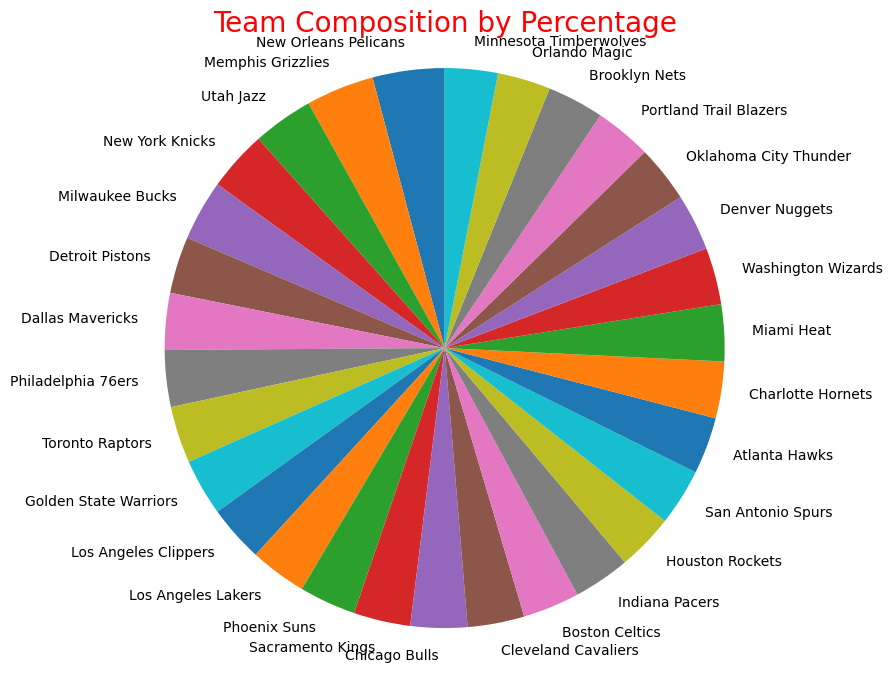

In [76]:

#To find the percentage of members in each team relative to the total number of employees

team_percentage = (df['Team'].value_counts(normalize=True)      ## fraction per team
                   .sort_values(ascending=False)* 100            # descending order
                  )                    
plt.figure(figsize=(10, 8))
plt.pie(team_percentage, labels=team_percentage.index, startangle=90)

plt.axis('equal')               # ensure circle shape
plt.title('Team Composition by Percentage',color='Red',fontsize=20)
plt.show()



#  Segregate employees based on their positions within the company.

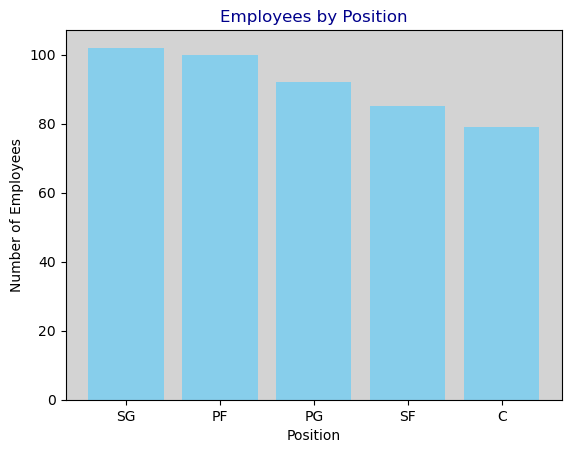

In [105]:
#  finding positions and their counts in data
position=df['Position'].value_counts() 

# ploting position and counts using bar plot
plt.bar( position.index, position.values, color="skyblue")
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.title('Employees by Position',color='darkblue')

plt.gca().set_facecolor('lightgray')
plt.show()




Here, from the bar chart it is clear that no.of employee in Shooting guard - SG is higher than other positions which is 102. The  Power forward - PF 
 is the second highest position in  number of employees which is 100 . Least number of employee is in the position Center - C that is 79 employees,
    SF and  PG position have 85 and  92 number of employees respectively

#  Identifying the predominant age group among employees.


In [21]:

# finding min and max age in employee
df['Age'].min()   #19
df['Age'].max()    #40

#Create column age group , values between minimum and max age
bins = [18, 24, 30, 36, 42]
labels = ['18-23', '24-29', '30-35', '36-41']

# Add a new column for age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# finding value counts of AgeGroup column
df['AgeGroup'].value_counts()

AgeGroup
24-29    229
18-23    107
30-35     99
36-41     23
Name: count, dtype: int64

Text(0.5, 1.0, 'Predominant Age Group Among Employees')

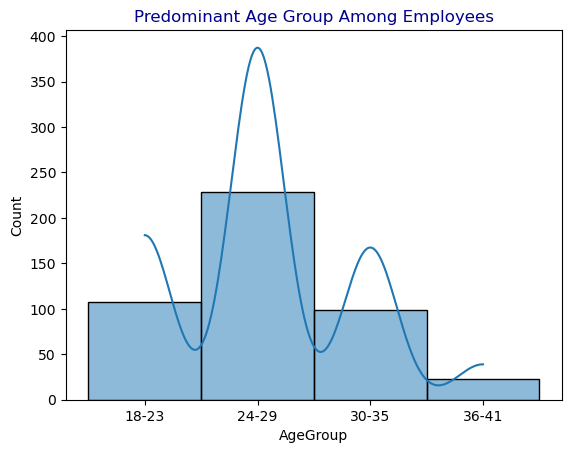

In [24]:
# Ploting a histogram to visually represents counts of age group 
data=df['AgeGroup']
sns.histplot(data=df, x=data,kde=True)
plt.title('Predominant Age Group Among Employees',color='darkblue')

From the histogram and value_counts() its clear that the age group 24-29 has highest count of enployee(229),then age group 18-24 have second highest no.of employees(107), age group from 36 to 41 has least no.of employee ie,23

#  Discover which team and position have the highest salary expenditure.

In [41]:
# grouping columns  based on Team Position and finding maximun salary
grouped = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()

# Find the row with the maximum salary expenditure
max_salary_row=grouped.loc[grouped['Salary'].idxmax()]

max_salary_row
# printing maximun salary and its Position and Team
print("Maximum salary expenditure",max_salary_row['Salary'])
print("Team",max_salary_row['Team'])
print("Position",max_salary_row['Position'])

Max salary 31866445.0
Team Los Angeles Lakers
Position SF


Text(0.5, 1.0, 'Top 5 Salary Expenditure Teams')

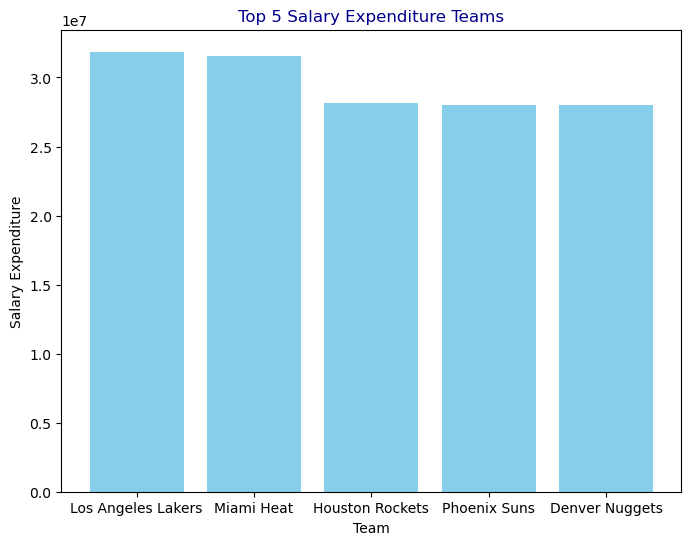

In [58]:
# ploting top 5 salary expenditure  team using bar plot
# Finding top 5 salary expenditure team
max_salary=grouped.nlargest(5,'Salary')

plt.figure(figsize=(8, 6))
plt.bar(max_salary.Team, max_salary.Salary, color="skyblue")

plt.xlabel('Team')
plt.ylabel('Salary Expenditure')
plt.title('Top 5 Salary Expenditure Teams',color='darkblue')

From the bar chart and calculations it is clear that Maximum salary expenditure is31866445.0 for the Team Los Angeles Lakers and 
Position is SF.The next top 4  salary expenditure  teams are Miami Heat, Houston Rockets , Phoenix Suns and Denver Nuggets respectivly.


# Investigate if there's any correlation between age and salary, and represent it visually.

In [59]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,AgeGroup
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0,24-29
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0,24-29
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN,24-29
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0,18-23
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0,24-29
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0,24-29
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0,24-29
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0,24-29
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0,24-29


<Axes: xlabel='Age', ylabel='Salary'>

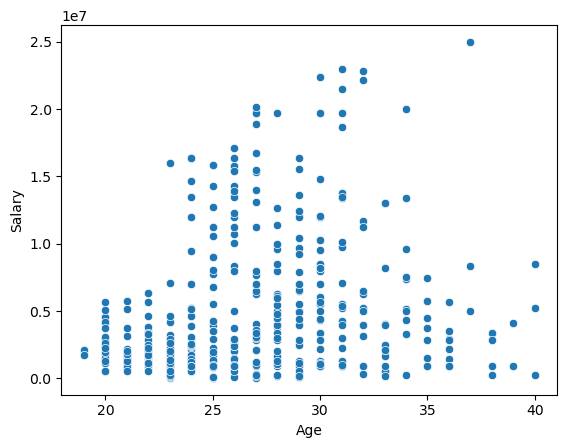

In [2]:
# Ploting Age and Salary to find correlation

sns.scatterplot(data=df, x="Age", y="Salary")



from scatter plot age between 30 and 35 has highest salary age between 19 and 24 shows lowest salary.from scatter plot it is not clearly shows any corelation between age and salary columns

Another method to find corelation is corr() function

In [3]:
correlation = df['Age'].corr(df['Salary'])
print("Correlation:", correlation)


Correlation: 0.21400941226570985


from scatter plot age between 30 and 35 has highest salary age between 19 and 24 shows lowest salary.from scatter plot it is not clearly shows any corelation between age and salary columns

Another method to find corelation is corr() function

In [69]:
correlation = df['Age'].corr(df['Salary'])
print("Correlation:", correlation)

Correlation: 0.21400941226570985


corelation between  0.0 to ±0.2 shows very weak or no corelation between age and salary column
